# 1. 필요 라이브러리 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 로드하기

In [3]:
# train 데이터
df = pd.read_csv('/content/drive/MyDrive/data/3-7/train.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/data/3-7/test.csv')
df_test.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [ ]:
df.shape

(42100, 19)

* 총 42100개의 데이터, 19개 컬럼

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

* 결측값 없는 것으로 보임.
* 변수 설명
    * no_of_adults : 성인 수
    * no_of_children : 어린이 수
    * no_of_weekend_nights : 숙박 수 (주말)
    * no_of_week_nights : 숙박 수 (평일)
    * type_of_meal_plan : 식사 유형
    * required_car_parking_space : 주차 공간 필요 여부(0 - 필요 없음, 1 - 필요 있음)
    * room_type_served : 예약한 객실 유형
    * lead_time : 예약 날짜와 입실 날짜 차이
    * arrival_year : 도착 날짜의 연도
    * arrival_month : 도착 날짜의 월
    * arrival_date : 도착 날짜
    * market_segment_type : ?
    * repeated_guest : 재방문 여부(0 - 재방문 X , 1 - 재방문 O)
    * no_of_previous_cancellations : 전에 취소한 예약 수
    * no_of_previous_bookings_not_canceled : 전에 취소하지 않은 예약 수
    * avg_price_per_room : 당일 평균 가격 예약(유동적, 단위 - 유로)
    * no_of_special_requests : 고객이 요청한 특별 요청 수(ex - 높은 층, 객실에서 보이는 전망 등)
    * booking_status : 예약 취소 여부(0 - 예약 취소 x / 1 - 예약 취소 o 

# 3. 변수 별 분석하기

## booking_status(target)

In [ ]:
df['booking_status'].value_counts()

0    25596
1    16504
Name: booking_status, dtype: int64

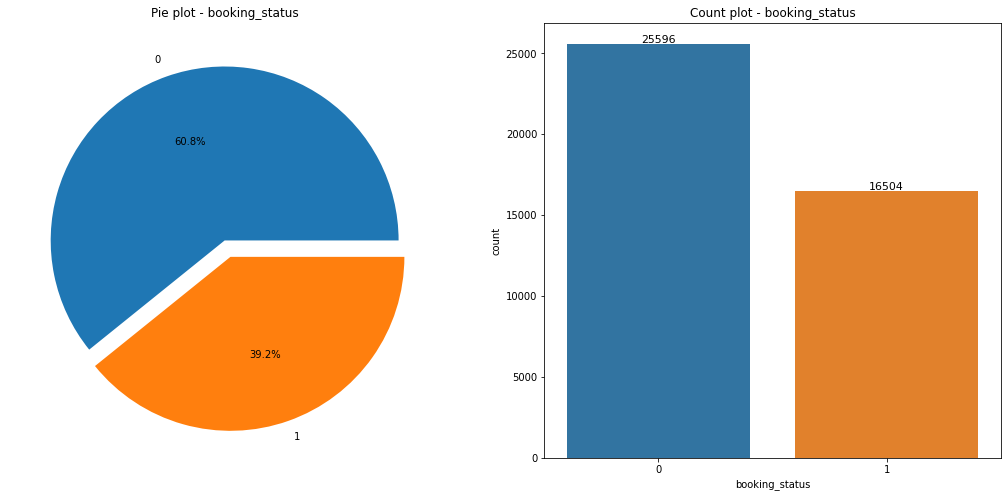

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))


df['booking_status'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('Pie plot - booking_status')
ax[0].set_ylabel('')

ax[1].set_title('Count plot - booking_status')
ax = sns.countplot(data = df, x = 'booking_status', ax = ax[1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 11)

plt.show()

* 예약 취소를 하지 않은 팀이 42100팀 중에 25596팀으로 60.8%이다.
* 예약 취소를 한 팀이 42100팀 중에 16504팀으로 39.2%이다.

## value_counts()로 데이터 살펴보기

In [ ]:
df['no_of_adults'].value_counts().sort_index()

0      167
1     7089
2    30771
3     4061
4       12
Name: no_of_adults, dtype: int64

* 어른 수는 0 ~ 4명으로 구성되어 있다.
* 대부분 어른 수는 2명이다.

In [ ]:
df['no_of_children'].value_counts().sort_index()

0    37786
1     2729
2     1561
3       17
4        5
9        2
Name: no_of_children, dtype: int64

* 어린이 수는 0 ~ 9명으로 구성되어 있다.
* 대부분 어린이 수는 0명이다.

In [ ]:
df['no_of_weekend_nights'].value_counts().sort_index()

0    18137
1    11389
2    12143
3      239
4      128
5       46
6       17
7        1
Name: no_of_weekend_nights, dtype: int64

* 주말 숙박 수가 7번이면 호텔에 3주 묵은 것인가??

In [ ]:
df['no_of_week_nights'].value_counts().sort_index()

0      1937
1      9558
2     12905
3     10286
4      4175
5      2573
6       237
7       160
8        84
9        53
10       82
11       16
12        9
13        5
14        3
15       11
16        4
17        2
Name: no_of_week_nights, dtype: int64

* 평일 숙박 수가 17번이면 3주 묵은 것인가?
    * 데이터 내 최대로 숙박을 오래한 사람은 3주 정도

In [ ]:
df['type_of_meal_plan'].value_counts().sort_index()

0    35463
1     3210
2     3421
3        6
Name: type_of_meal_plan, dtype: int64

* 식사 유형은 총 4가지가 있다. 어떤 기준으로 분류된건지는 알 수 없음.

In [ ]:
df['required_car_parking_space'].value_counts().sort_index()

0    41037
1     1063
Name: required_car_parking_space, dtype: int64

* 주차공간을 필요로 하지 않는 사람이 더 많다. 

In [ ]:
df['room_type_reserved'].value_counts().sort_index()

0    29853
1     9135
2     1131
3     1465
4      320
5      190
6        6
Name: room_type_reserved, dtype: int64

In [ ]:
df['lead_time'].value_counts().sort_index()

0      827
1      846
2      502
3      480
4      463
      ... 
381      7
386     62
418     49
433     13
443     24
Name: lead_time, Length: 338, dtype: int64

* 0은 당일 예약, 443은 1년 이상 전에 예약

In [ ]:
df['arrival_year'].value_counts().sort_index()

2017     6050
2018    36050
Name: arrival_year, dtype: int64

* 2017,2018년 데이터

In [ ]:
df['arrival_month'].value_counts().sort_index()

1      805
2     1201
3     2201
4     3006
5     3292
6     3356
7     4681
8     5763
9     5148
10    6453
11    2803
12    3391
Name: arrival_month, dtype: int64

In [ ]:
df['arrival_date'].value_counts().sort_index()

1     1428
2     1408
3     1280
4     1438
5     1367
6     1426
7     1206
8     1412
9     1424
10    1253
11    1278
12    1339
13    1479
14    1164
15    1376
16    1600
17    1426
18    1291
19    1333
20    1437
21    1326
22    1274
23    1342
24    1218
25    1447
26    1460
27    1633
28    1398
29    1392
30    1538
31     707
Name: arrival_date, dtype: int64

In [ ]:
df['market_segment_type'].value_counts().sort_index()

0    14306
1    25885
2     1384
3       83
4      442
Name: market_segment_type, dtype: int64

* 무슨 변수인지 알 수 없음...

In [ ]:
df['repeated_guest'].value_counts().sort_index()

0    40871
1     1229
Name: repeated_guest, dtype: int64

* 재방문한 고객은 1229명이다.

In [ ]:
df['no_of_previous_cancellations'].value_counts().sort_index()

0     41755
1       195
2        53
3        51
4        15
5         3
6         2
8         1
11       22
13        3
Name: no_of_previous_cancellations, dtype: int64

* 대부분 이전에 취소한 적이 없지만 최대 13번 취소한 내역이 있는 사람이 있다.

In [5]:
df['no_of_previous_bookings_not_canceled'].value_counts().sort_index()

0     40993
1       262
2       147
3       112
4        87
5       102
6        49
7        44
8        52
9        20
10       34
11       36
12       23
13       10
14       11
15        1
16       14
17        4
18       21
19        2
20       10
21        4
22        1
23        6
24        4
25        2
26        2
27        4
28        1
30        4
32        5
33        4
35        5
36        3
37        2
41        1
43        4
44        2
46        4
47        3
48        3
58        2
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [7]:
df['avg_price_per_room'].value_counts().sort_index()

0.0      641
0.5        2
1.0       17
2.0        2
3.0        5
        ... 
306.0      2
310.0      1
316.0      2
375.5      6
540.0      5
Name: avg_price_per_room, Length: 2286, dtype: int64

In [8]:
df['no_of_special_requests'].value_counts().sort_index()

0    24554
1    11885
2     4900
3      660
4      100
5        1
Name: no_of_special_requests, dtype: int64

## heatmap

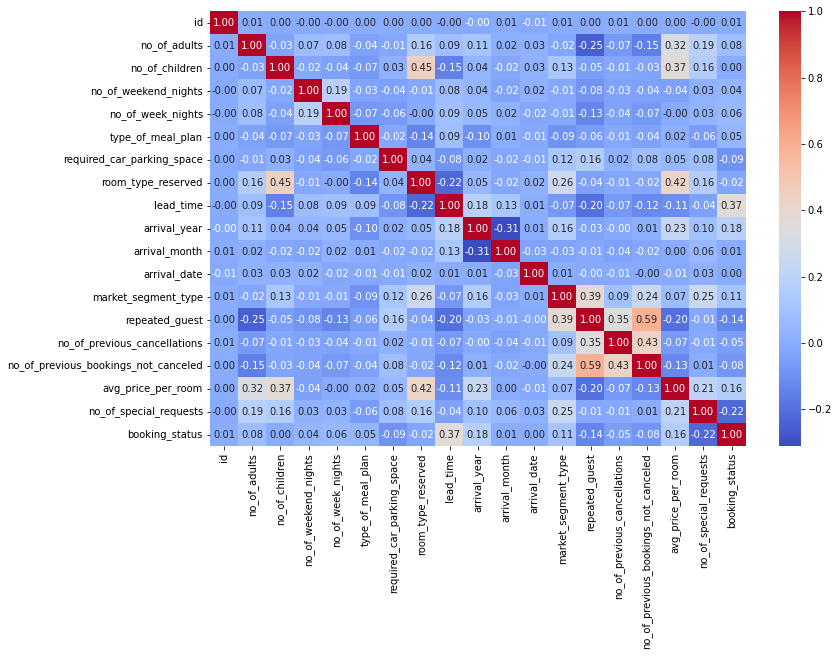

In [87]:
plt.figure(figsize = (12,8))
sns.heatmap(data = df.corr(), cmap = 'coolwarm', annot = True, fmt = ".2f")

* 예약을 미리할 수록 예약 취소를 한다.

## no_of_adults & no_of_children

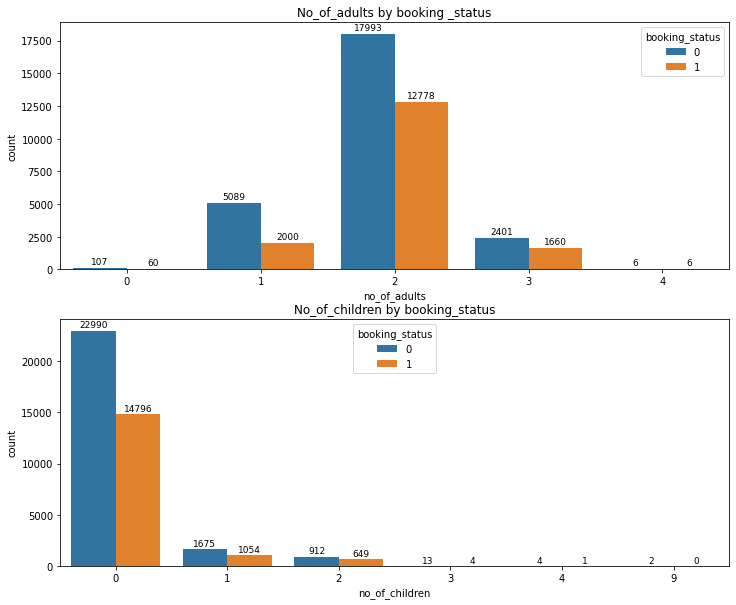

In [36]:
f, ax = plt.subplots(2, 1, figsize = (12,10))

sns.countplot(data = df, x = 'no_of_adults', hue = 'booking_status', ax = ax[0])
ax[0].set_title('No_of_adults by booking _status')

for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 300, height, ha = 'center', size = 9)

sns.countplot(data = df, x = 'no_of_children', hue = 'booking_status', ax = ax[1])
ax[1].set_title('No_of_children by booking_status')

for p in ax[1].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[1].text(p.get_x() + p.get_width() / 2., height + 300, height, ha = 'center', size = 9)

* 어른 수는 2명 어린이 수는 0명인 고객이 가장 많았다.
* 어린이 수가 9명일 때 예약 취소를 한 고객은 없다.

* 어른 + 어린이 수가 많을수록 예약을 취소한 경우는 어느정도 일까?



In [38]:
df_new = df.copy()

df_new['total_count'] = df_new['no_of_adults'] + df_new['no_of_children']

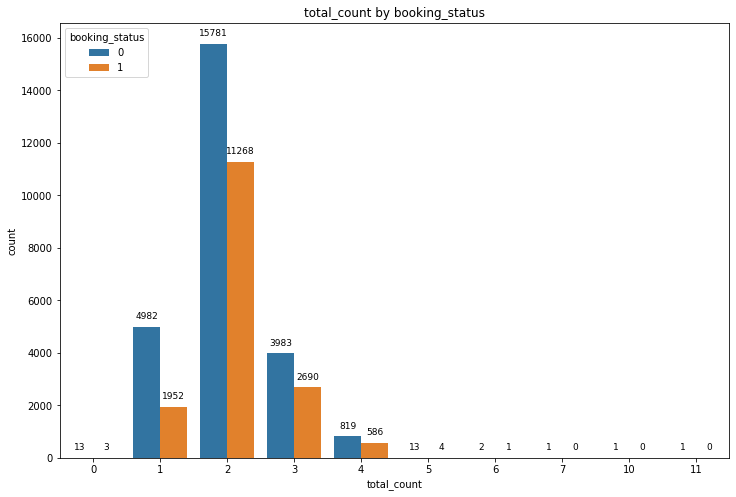

In [44]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(data = df_new, x = 'total_count', hue = 'booking_status')

for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax.text(p.get_x() + p.get_width() / 2., height + 300, height, ha = 'center', size = 9)
plt.title('total_count by booking_status')
plt.show()

In [45]:
pd.crosstab(df['no_of_adults'], df['booking_status'], normalize = 'index')

booking_status,0,1
no_of_adults,,
0,0.640719,0.359281
1,0.717873,0.282127
2,0.584739,0.415261
3,0.591234,0.408766
4,0.500000,0.500000


In [46]:
pd.crosstab(df['no_of_children'], df['booking_status'], normalize = 'index')

booking_status,0,1
no_of_children,,
0,0.608426,0.391574
1,0.613778,0.386222
2,0.584241,0.415759
3,0.764706,0.235294
4,0.800000,0.200000
9,1.000000,0.000000


In [47]:
pd.crosstab(df_new['total_count'], df_new['booking_status'], normalize = 'index')

booking_status,0,1
total_count,,
0,0.812500,0.187500
1,0.718489,0.281511
2,0.583423,0.416577
3,0.596883,0.403117
4,0.582918,0.417082
5,0.764706,0.235294
6,0.666667,0.333333
7,1.000000,0.000000
10,1.000000,0.000000


* 인원이 엄청 많은 경우 예약 취소를 잘 하지 않았다.
* total_count가 0인 걸로 봐서 인원을 어른, 어린이로만 나눈 것은 아닌 것 같다.

## no_of_weekend_nights & no_of_week_nights

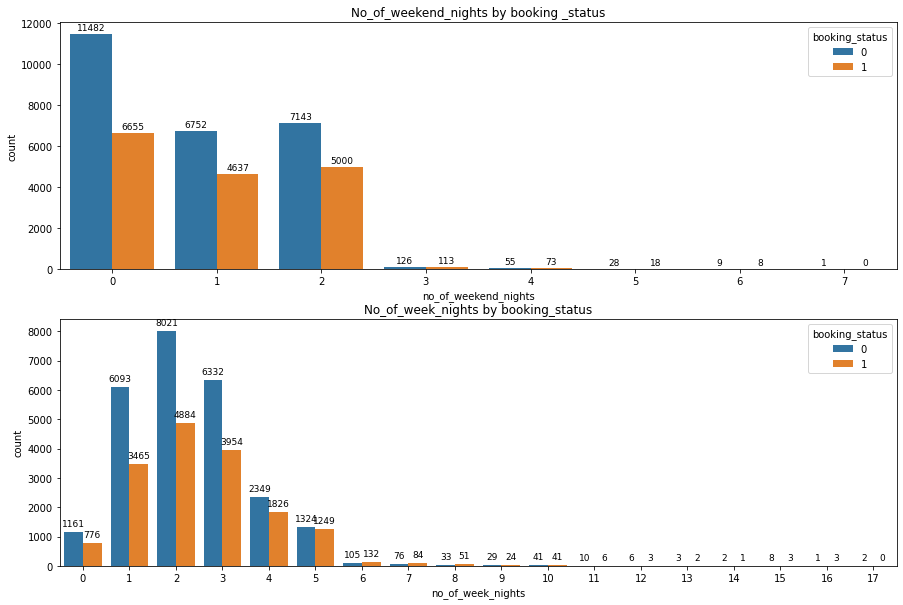

In [75]:
f, ax = plt.subplots(2, 1, figsize = (15,10))


sns.countplot(data = df, x = 'no_of_weekend_nights', hue = 'booking_status', ax = ax[0])
ax[0].legend(title = 'booking_status', loc = 'upper right')
ax[0].set_title('No_of_weekend_nights by booking _status')
for p in ax[0].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[0].text(p.get_x() + p.get_width() / 2., height + 200, height, ha = 'center', size = 9)

sns.countplot(data = df, x = 'no_of_week_nights', hue = 'booking_status', ax = ax[1])
ax[1].legend(title = 'booking_status', loc = 'upper right')
ax[1].set_title('No_of_week_nights by booking_status')

for p in ax[1].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[1].text(p.get_x() + p.get_width() / 2., height + 200, height, ha = 'center', size = 9)


plt.show()

* 주말, 주중을 나눈 기준을 아직 파악하지 못했다.
* 우선, 주말/주중 상관없이 총 숙박일 수를 기준으로 예약 취소 현황을 살펴보자!!

In [53]:
df_new = df.copy()

df_new['total_nights'] = df_new['no_of_weekend_nights'] + df_new['no_of_week_nights']
df_new['total_nights'].value_counts()

3     11843
4      8310
2      8282
1      5919
5      3717
7      1621
6      1531
8       255
10      152
9       139
0       114
11       48
14       39
13       33
12       29
15       27
16       11
18        8
21        6
20        6
17        4
23        2
22        2
19        2
Name: total_nights, dtype: int64

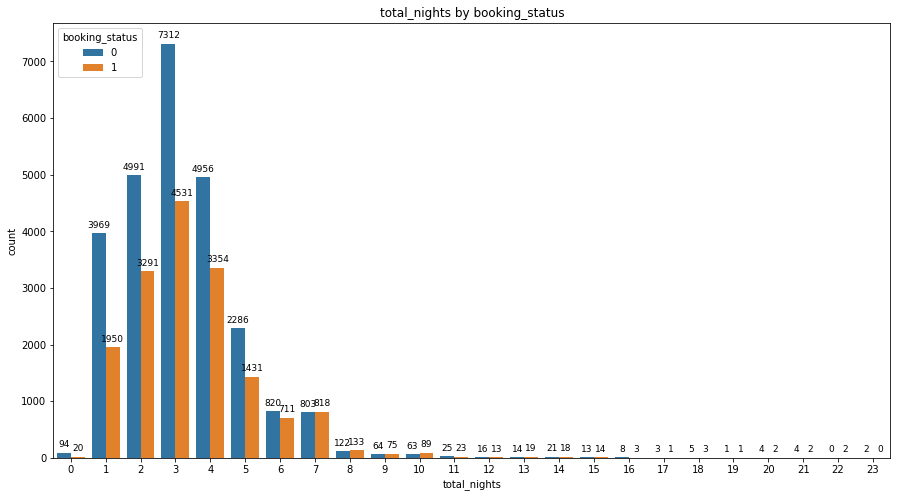

In [62]:
plt.figure(figsize = (15,8))
ax = sns.countplot(data = df_new, x = 'total_nights', hue = 'booking_status')

for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)

plt.title('total_nights by booking_status')
plt.show()

In [79]:
df_new[(df_new['total_nights'] == 22) | (df_new['total_nights'] == 23)]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
11529,11529,2,0,6,17,1,0,0,18,2018,11,14,1,0,0,0,75.82,0,0,23
12831,12831,1,0,6,17,0,0,0,9,2018,1,28,1,0,0,0,68.23,0,0,23
13392,13392,2,0,6,16,0,0,1,10,2018,4,16,1,0,0,0,128.86,0,1,22
20841,20841,1,0,6,16,0,0,0,109,2018,5,4,1,0,0,0,89.25,0,1,22


In [80]:
df_new[df_new['no_of_weekend_nights'] == 7]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
37033,37033,1,0,7,1,0,0,0,111,2018,6,3,0,0,0,0,96.67,1,0,8


* 주말기준 7일을 숙박했는데 주중에 1일 숙박한게 가능한가??

## type_of_meal_plan & required_car_parking_space & 	room_type_reserved

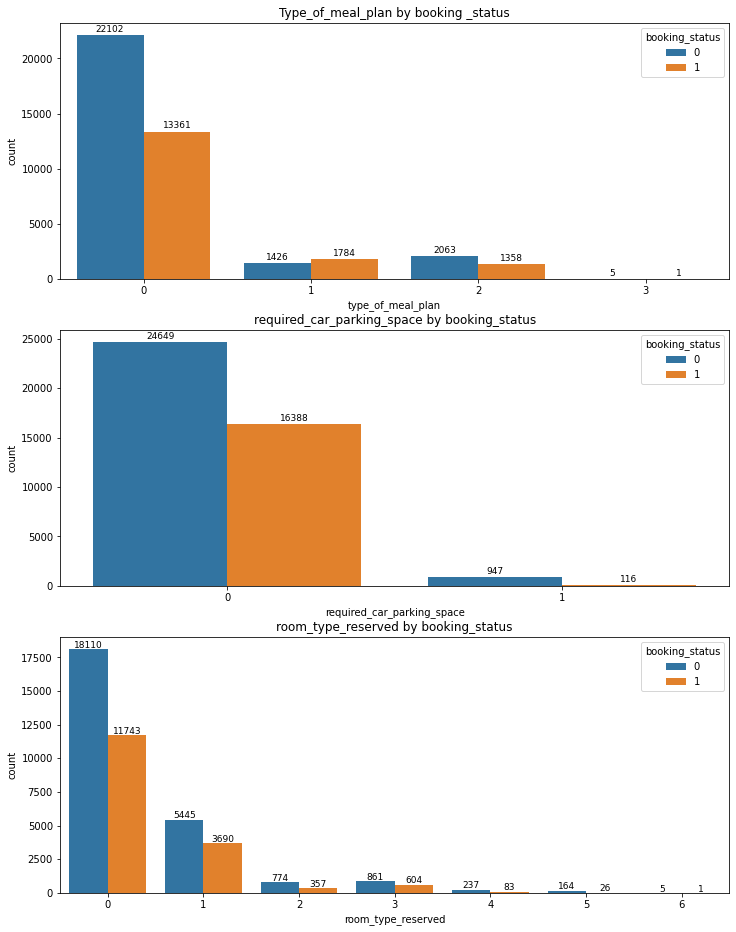

In [95]:
f, ax = plt.subplots(3, 1, figsize = (12,16))

sns.countplot(data = df, x = 'type_of_meal_plan', hue = 'booking_status', ax = ax[0])
ax[0].set_title('Type_of_meal_plan by booking _status')

for p in ax[0].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[0].text(p.get_x() + p.get_width() / 2., height + 300, height, ha = 'center', size = 9)

sns.countplot(data = df, x = 'required_car_parking_space', hue = 'booking_status', ax = ax[1])
ax[1].set_title('required_car_parking_space by booking_status')

for p in ax[1].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[1].text(p.get_x() + p.get_width() / 2., height + 300, height, ha = 'center', size = 9)


sns.countplot(data = df, x = 'room_type_reserved', hue = 'booking_status', ax = ax[2])
ax[2].set_title('room_type_reserved by booking_status')

for p in ax[2].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[2].text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)

plt.show()

* 식사 유형이 1인 경우에 예약 취소를 더 많이 했다.

In [90]:
# 식사 유형 1 살펴보기
df_meal1 = df[df['type_of_meal_plan'] == 1]
df_meal1

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
13,13,2,0,2,3,1,0,0,217,2018,8,22,1,0,0,0,63.75,0,1
32,32,2,0,0,2,1,0,0,317,2018,9,15,1,0,0,0,120.00,0,1
43,43,2,0,0,4,1,0,0,208,2018,7,30,1,0,0,0,80.75,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42003,42003,2,0,1,3,1,0,0,155,2018,7,17,1,0,0,0,103.50,2,1
42032,42032,2,0,0,3,1,0,0,73,2018,3,12,1,0,0,0,67.50,2,0
42047,42047,2,0,0,4,1,0,0,196,2018,8,9,1,0,0,0,85.50,1,1
42058,42058,2,0,1,2,1,0,0,115,2018,8,24,1,0,0,0,94.50,0,1


In [91]:
df_meal1.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.0,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000
mean,20844.491900,1.901869,0.066355,0.951713,2.389408,1.0,0.022118,0.085981,130.917445,2017.965732,7.774143,16.070717,0.933956,0.005919,0.028037,0.017445,91.098243,0.578193,0.555763
std,12092.266922,0.315828,0.301066,0.930344,1.685940,0.0,0.147091,0.482240,67.690392,0.181945,2.666766,9.065926,0.277997,0.076719,0.549080,0.351741,21.649329,0.720287,0.496958
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10252.000000,2.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,94.250000,2018.000000,6.000000,8.000000,1.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,20815.000000,2.000000,0.000000,1.000000,2.000000,1.0,0.000000,0.000000,131.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,89.250000,0.000000,1.000000
75%,31366.500000,2.000000,0.000000,2.000000,3.000000,1.0,0.000000,0.000000,175.000000,2018.000000,10.000000,25.000000,1.000000,0.000000,0.000000,0.000000,103.500000,1.000000,1.000000
max,42091.000000,3.000000,2.000000,6.000000,17.000000,1.0,1.000000,5.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,11.000000,10.000000,231.000000,4.000000,1.000000


## lead_time

In [99]:
print('예약한지 가장 오래된 일 수: {:.1f}'.format(df['lead_time'].max()))
print('예약한지 가장 최근 일 수 : {:.1f}'.format(df['lead_time'].min()))
print('평균: {:.1f}'.format(df['lead_time'].mean()))

예약한지 가장 오래된 일 수: 443.0
예약한지 가장 최근 일 수 : 0.0
평균: 103.9


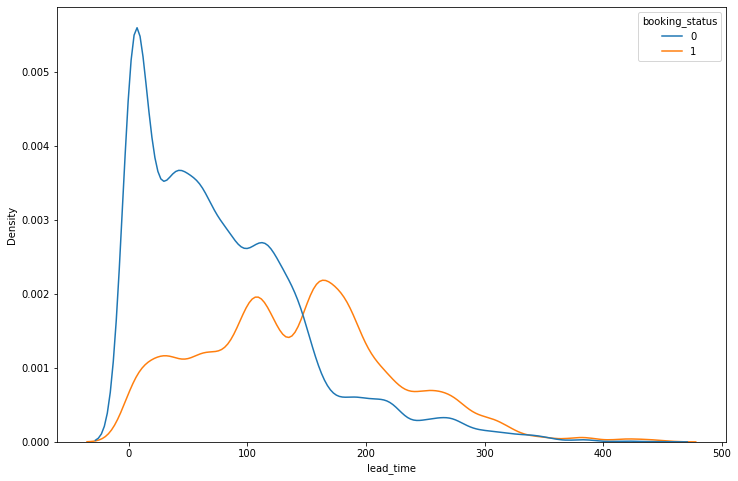

In [100]:
plt.figure(figsize = (12, 8))
sns.kdeplot(data = df, x = 'lead_time', hue = 'booking_status')

* 예약한지 오래될수록 예약 취소한 경우가 많다.
* 약 160일 이상되면 고객들이 취소를 한다.

In [105]:
df.groupby('booking_status')['lead_time'].agg(['mean', 'max', 'min'])

,mean,max,min
booking_status,,,
0,79.485466,443,0
1,141.733883,443,0


* 예약날짜와 도착날짜 사이의 일 수가 최소, 최대일 때 모두 예약 취소를 한적이 있고 안한적이 있지만 평균값으로 봤을때 사이의 일 수가 오래될수록 예약 취소를 했다.

## arrival_year, arrival_month, arrival_date

In [127]:
df_date = df[['arrival_year', 'arrival_month', 'arrival_date', 'booking_status']]
df_date

,arrival_year,arrival_month,arrival_date,booking_status
0,2018,1,14,0
1,2018,7,29,0
2,2018,12,2,0
3,2018,12,1,0
4,2018,10,16,1
...,...,...,...,...
42095,2018,12,30,1
42096,2017,9,23,0
42097,2018,7,21,0
42098,2018,11,9,0


In [134]:
df_date = df_date.astype({'arrival_year' : 'str', 'arrival_month' : 'str', 'arrival_date' : 'str'})
df_date

,arrival_year,arrival_month,arrival_date,booking_status
0,2018,1,14,0
1,2018,7,29,0
2,2018,12,2,0
3,2018,12,1,0
4,2018,10,16,1
...,...,...,...,...
42095,2018,12,30,1
42096,2017,9,23,0
42097,2018,7,21,0
42098,2018,11,9,0


In [140]:
df_date['ymd'] = df_date['arrival_year'] + '-' + df_date['arrival_month'] + '-' + df_date['arrival_date']

In [142]:
df_date['ymd'] = pd.to_datetime(df_date['ymd'])
df_date

ParserError: ignored

* 2018년 2월 29일은 존재하지 않음!!! 

# 4. 모델링